In [7]:
import utils as utils
import ANN as ann
import numpy as np
from scipy.io import loadmat, savemat

In [2]:
data = loadmat('data/ex3data1.mat', squeeze_me=True)
y = data['y']
X = data['X']

IndexError: index 5000 is out of bounds for axis 0 with size 5000

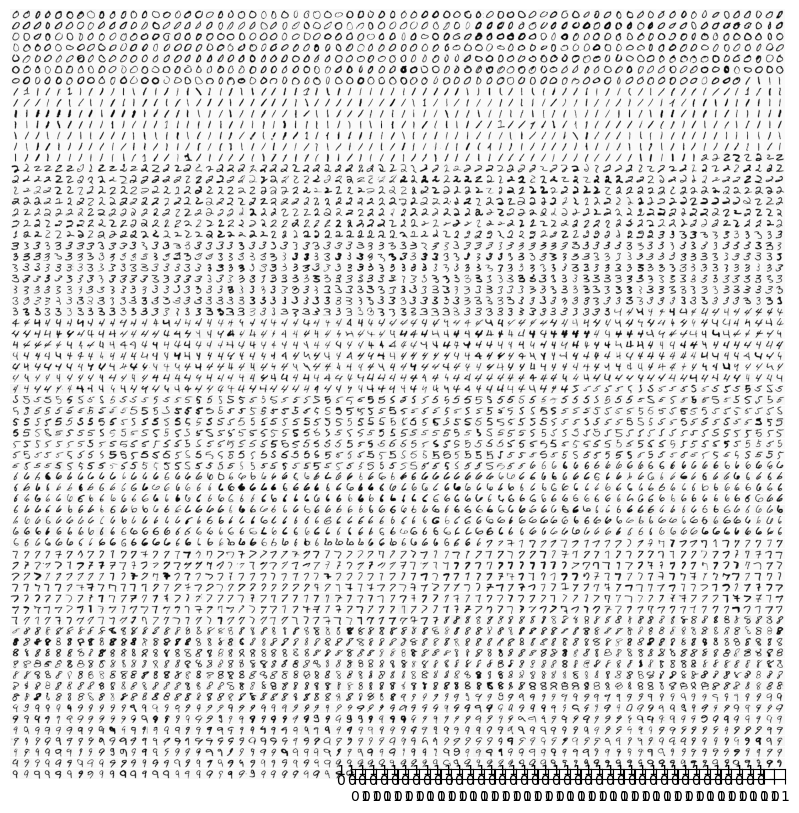

In [3]:
utils.displayData(X)

In [4]:
weights = loadmat('data/ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [10]:
m = X.shape[0]
X1s = np.hstack([np.ones((m, 1)), X])
p=ann.predict(theta1, theta2, X)
print(p)

[[9.95734012e-01 9.95696931e-01 9.28008397e-01 ... 2.42384687e-05
  2.06173648e-04 8.18576980e-02]
 [1.12661530e-04 4.79026796e-04 8.85702310e-05 ... 5.17641791e-02
  8.30631310e-04 4.81465717e-05]
 [1.74127856e-03 2.41495958e-03 3.24266731e-03 ... 3.81715020e-03
  6.22003774e-04 4.58821829e-04]
 ...
 [5.51517524e-03 1.15788527e-02 3.86839058e-04 ... 1.44301919e-04
  1.20516046e-02 3.69700393e-02]
 [4.01468105e-04 2.39107046e-03 6.22892325e-02 ... 2.15667361e-03
  1.19366192e-02 5.73434571e-03]
 [6.48072305e-03 1.97025086e-03 5.49803551e-03 ... 6.49826950e-01
  9.71410499e-01 6.96288990e-01]]


In [9]:
acuracy=0
for i in y:
    if y[i]==p[i]:
        acuracy= acuracy+1
print (acuracy)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()